In [1]:
import pandas as pd
import os

In [3]:
os.chdir('..')
papers = pd.read_csv('E:\Github_chianle67\LDA-Topic-Modeling\df_industry40.csv')
papers.head()

,Abstract,Title
0,"IN AN INDUSTRYFOURTH CONTEXT, TO EACH OBJECT A...",3D IDENTIFICATION OF FACE AND FLANK IN MICROMI...
1,THE DIGITALTWIN IS A RECENTLY DEVELOPED INNOVA...,5DIMENSIONAL DEFINITION FOR A MANUFACTURING DI...
2,FACTORIES ARE EVOLVING TOWARDS DIGITALIZED DAT...,5G CONFIGURED GRANT SCHEDULING FOR 5GTSN INTEG...
3,"AS AN IMPORTANT PART OF THE REAL ECONOMY, MANU...",5G IN MANUFACTURING A LITERATURE REVIEW AND FU...
4,"IN THIS PAPER, A COMPREHENSIVE OVERVIEW OF DIG...",5G MOBILE NETWORKS AND DIGITALTWINS CONCEPT RE...


**Remove PUNCTUATIONS '[,\.!?]', and then LOWER texts**

In [4]:
# Load the regular expression library
import re

# Remove punctuation
papers['abstract_processed'] = papers['Abstract'].map(lambda x: re.sub('[,\.!?]', '', str(x)))
papers['abstract_processed'] = papers['abstract_processed'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the abstracts to lowercase
papers['abstract_processed'] = papers['abstract_processed'].map(lambda x: x.lower())
papers.head()

,Abstract,Title,abstract_processed
0,"IN AN INDUSTRYFOURTH CONTEXT, TO EACH OBJECT A...",3D IDENTIFICATION OF FACE AND FLANK IN MICROMI...,in an industryfourth context to each object a ...
1,THE DIGITALTWIN IS A RECENTLY DEVELOPED INNOVA...,5DIMENSIONAL DEFINITION FOR A MANUFACTURING DI...,the digitaltwin is a recently developed innova...
2,FACTORIES ARE EVOLVING TOWARDS DIGITALIZED DAT...,5G CONFIGURED GRANT SCHEDULING FOR 5GTSN INTEG...,factories are evolving towards digitalized dat...
3,"AS AN IMPORTANT PART OF THE REAL ECONOMY, MANU...",5G IN MANUFACTURING A LITERATURE REVIEW AND FU...,as an important part of the real economy manuf...
4,"IN THIS PAPER, A COMPREHENSIVE OVERVIEW OF DIG...",5G MOBILE NETWORKS AND DIGITALTWINS CONCEPT RE...,in this paper a comprehensive overview of digi...


In [5]:
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
       yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc = de-accents

data = papers.abstract_processed.values.tolist()
data_words = list(sent_to_words(data))


**Build BIGRAM and TRIGRAM models**

In [6]:
# Build the bigram models
bigram = gensim.models.Phrases(data_words, min_count=2, threshold=4) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=4)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_model = gensim.models.phrases.Phraser(bigram)
trigram_model = gensim.models.phrases.Phraser(trigram)

In [7]:
import requests
stopwords_list = requests.get("https://gist.githubusercontent.com/rg089/35e00abf8941d72d419224cfd5b5925d/raw/12d899b70156fd0041fa9778d657330b024b959c/stopwords.txt").content
stop_words = set(stopwords_list.decode().splitlines()) 
print(stop_words)

{'thence', 'ln', 'i3', 'isn', "here's", 'possibly', 'unless', 'thorough', 'three', 'index', 'whither', 'et', 'ok', 'unlike', 'wonder', 'oa', 'seen', 'fr', "we've", 'ey', 'became', 'mug', 'or', 'pe', 'hopefully', 'gi', 'y2', 'ko', 'couldn', 'provides', 'bu', 'ne', 'sq', 'dk', 'yj', 'comes', 'why', 'everybody', 'hu', 'en', 'known', 'normally', 'eg', 'these', 'howbeit', 'gets', 'noted', 'ourselves', 'necessary', 'ny', "he'll", 'fu', 'nine', 'neither', 'related', 'following', 'same', 'vols', 'dx', 'ad', 'further', 'cs', 'obviously', 'concerning', 'whether', "why's", 'appreciate', 'am', 'described', 'un', 'begin', 'hy', 'information', 'your', 'cause', 'y', 'immediately', 'put', "can't", 'inner', 'pj', 'afterwards', 'many', 'ci', 'ft', 'other', 's2', 'near', 'way', 'because', "c's", 'largely', 'fill', 'rt', 'ord', 'dr', 'mr', 'stop', 'to', '0o', 'asking', 'b1', 'gotten', 'look', 'ups', 'next', 'know', 'old', 'ones', 'usually', 'alone', 'away', 'according', 'interest', 'pi', 'pages', 'added',

In [8]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_model[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_model[bigram_model[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [9]:
!python -m spacy download en_core_web_sm
import spacy

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB 6.7 MB/s eta 0:00:02
     - -------------------------------------- 0.6/12.8 MB 5.2 MB/s eta 0:00:03
     -- ------------------------------------- 0.7/12.8 MB 4.7 MB/s eta 0:00:03
     -- ------------------------------------- 0.9/12.8 MB 4.5 MB/s eta 0:00:03
     --- ------------------------------------ 1.1/12.8 MB 4.3 MB/s eta 0:00:03
     --- ------------------------------------ 1.2/12.8 MB 4.3 MB/s eta 0:00:03
     ---- ----------------------------------- 1.4/12.8 MB 4.2 MB/s eta 0:00:03
     ---- ----------------------------------- 1.6/12.8 MB 4.2 MB/s eta 0:00:03
     ----- ---------------------------------- 1.8/12.8 MB 4.2 MB/s eta 0:00:03
     ------ --------------------------------- 2.0/12.8 MB 4.2 MB/s eta 0:00:03
     ------ --------------------------------- 2.2/12.8 MB 4.3 MB/s eta 0:00:03
     ------- -------------------------------- 2.3/12.8 MB 4


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**Remove STOP WORDS, make BIGRAMS and TRIGRAMS, and then LEMMATIZATION**

In [10]:
# Remove Stop Words
data_words_no_stop_words = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_no_stop_words)

# Form Trigrams
data_words_trigrams = make_trigrams(data_words_no_stop_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized_bigrams = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
data_lemmatized_trigrams = lemmatization(data_words_trigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [11]:
import gensim.corpora as corpora

In [12]:
# Create Dictionary
id2word_bigrams = corpora.Dictionary(data_lemmatized_bigrams)
id2word_trigrams = corpora.Dictionary(data_lemmatized_trigrams)


# Create Corpus
text_bigrams = data_lemmatized_bigrams
text_trigrams = data_lemmatized_trigrams

# Term Document Frequency
corpus_bigrams = [id2word_bigrams.doc2bow(text_bigrams) for text_bigrams in text_bigrams]
corpus_trigrams = [id2word_trigrams.doc2bow(text_trigrams) for text_trigrams in text_trigrams]


**Build LDA MODEL for exploratory**

In [13]:
# Build LDA model with bigrams
lda_model_bigrams = gensim.models.LdaMulticore(corpus=corpus_bigrams,
                                       id2word=id2word_bigrams,
                                       num_topics=10,
                                       random_state=42,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True,
                                       )

In [14]:
lda_model_trigrams = gensim.models.LdaMulticore(corpus=corpus_trigrams,
                                       id2word=id2word_trigrams,
                                       num_topics=10,
                                       random_state=42,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True,
                                       )

**The KEYWORDS for each topic and the WEIGHTAGE of each keyword**

In [ ]:
# Print the Keyword in the 10 topics
from pprint import pprint
pprint(lda_model_bigrams.print_topics())
doc_lda = lda_model_bigrams[corpus_bigrams]

**Calculate the COHERENCE SCORE**

In [15]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_lda_model_bigrams = CoherenceModel(model=lda_model_bigrams, 
                                     texts=data_lemmatized_bigrams, 
                                     dictionary=id2word_bigrams, 
                                     coherence='c_v')

coherence_lda_model_trigrams = CoherenceModel(model=lda_model_trigrams, 
                                     texts=data_lemmatized_trigrams, 
                                     dictionary=id2word_trigrams, 
                                     coherence='c_v')

cv_lda_model_bigrams = coherence_lda_model_bigrams.get_coherence()
cv_lda_model_trigrams = coherence_lda_model_trigrams.get_coherence()

print('Coherence Score Before Hyperparameter Tunning of LDA Model (Bigrams): ', cv_lda_model_bigrams)
print('Coherence Score Before Hyperparameter Tunning of LDA Model (Trigrams): ', cv_lda_model_trigrams)

Coherence Score Before Hyperparameter Tunning of LDA Model (Bigrams):  0.29324489095236456
Coherence Score Before Hyperparameter Tunning of LDA Model (Trigrams):  0.30717044418350403


**HYPERPARAMETER TUNNING for alpha, beta and k (nums of topic)**

In [16]:
# supporting function
def compute_coherence_values_lda_model_bigrams(corpus, dictionary, k, a, b):
    lda_model_bigrams = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k,
                                           random_state=42,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    coherence_lda_model_bigrams = CoherenceModel(model=lda_model_bigrams, 
                                         texts=data_lemmatized_bigrams, 
                                         dictionary=id2word_bigrams, 
                                         coherence='c_v')
    return coherence_lda_model_bigrams.get_coherence()

In [17]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.2))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.2))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus_bigrams)
corpus_sets = [gensim.utils.ClippedCorpus(corpus_bigrams, int(num_of_docs*0.75)),
               corpus_bigrams]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))

    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values_lda_model_bigrams(corpus=corpus_sets[i], dictionary=id2word_bigrams,
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)

                    pbar.update(1)

    pd.DataFrame(model_results).to_csv('E:\Github_chianle67\LDA-Topic-Modeling\lda_tuning_results_bigrams_industry_40.csv', index=False)
    pbar.close()

  0%|          | 0/756 [00:00<?, ?it/s]

100%|██████████| 756/756 [4:17:49<00:00, 20.46s/it]  


In [18]:
def compute_coherence_values_lda_model_trigrams(corpus, dictionary, k, a, b):
    lda_model_trigrams = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k,
                                           random_state=42,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    coherence_lda_model_trigrams = CoherenceModel(model=lda_model_trigrams, 
                                         texts=data_lemmatized_trigrams, 
                                         dictionary=id2word_trigrams, 
                                         coherence='c_v')
    return coherence_lda_model_trigrams.get_coherence()

In [19]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.2))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.2))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus_trigrams)
corpus_sets = [gensim.utils.ClippedCorpus(corpus_trigrams, int(num_of_docs*0.75)),
               corpus_trigrams]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))

    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values_lda_model_trigrams(corpus=corpus_sets[i], dictionary=id2word_trigrams,
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)

                    pbar.update(1)

    pd.DataFrame(model_results).to_csv('E:\Github_chianle67\LDA-Topic-Modeling\lda_tuning_results_trigrams_industry_40.csv', index=False)
    pbar.close()

  0%|          | 0/756 [00:00<?, ?it/s]

100%|██████████| 756/756 [3:53:03<00:00, 18.50s/it]  


**LDA VISUALIZATION**

In [22]:
lda_model_bigrams_hyper_param_tunned = gensim.models.LdaMulticore(corpus=corpus_bigrams,
                                           id2word=id2word_bigrams,
                                           num_topics=10,
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.81,
                                           eta=0.81)

In [23]:
lda_model_trigrams_hyper_param_tunned = gensim.models.LdaMulticore(corpus=corpus_trigrams,
                                           id2word=id2word_trigrams,
                                           num_topics=10,
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.81,
                                           eta=0.81)

In [26]:
coherence_model_lda_bigrams_hyper_param_tunned = CoherenceModel(model=lda_model_bigrams_hyper_param_tunned, 
                                     texts=data_lemmatized_bigrams, 
                                     dictionary=id2word_bigrams, coherence='c_v')
print('Coherence Score After Hyperparameter Tunning: ', coherence_model_lda_bigrams_hyper_param_tunned.get_coherence())

Coherence Score After Hyperparameter Tunning:  0.401552430142154


In [21]:
%pip install --upgrade gensim
%pip install pyldavis==3.4.1
import pyLDAvis.gensim
import pickle
import pyLDAvis

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('E:\Github_chianle67\LDA-Topic-Modeling\ldaviz_bigrams_tunned_' + str(10))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model_bigrams_hyper_param_tunned, corpus_bigrams, id2word_bigrams)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, 'E:\Github_chianle67\LDA-Topic-Modeling\ldaviz_bigrams_tunned_' + str(10) + '.html')

LDAvis_prepared

<>:4: DeprecationWarning: invalid escape sequence '\G'
<>:17: DeprecationWarning: invalid escape sequence '\G'
<>:4: DeprecationWarning: invalid escape sequence '\G'
<>:17: DeprecationWarning: invalid escape sequence '\G'
C:\Users\DELL\AppData\Local\Temp\ipykernel_11888\342461315.py:4: DeprecationWarning: invalid escape sequence '\G'
  LDAvis_data_filepath = os.path.join('E:\Github_chianle67\LDA-Topic-Modeling\ldaviz_bigrams_tunned_' + str(10))
C:\Users\DELL\AppData\Local\Temp\ipykernel_11888\342461315.py:17: DeprecationWarning: invalid escape sequence '\G'
  pyLDAvis.save_html(LDAvis_prepared, 'E:\Github_chianle67\LDA-Topic-Modeling\ldaviz_bigrams_tunned_' + str(10) + '.html')


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.269014  0.007130       1        1  82.108676
8     -0.004442 -0.055051       2        1   5.000973
6      0.034868  0.016112       3        1   2.286412
4      0.036520  0.007038       4        1   1.970475
7      0.035329  0.013081       5        1   1.891992
9      0.034226  0.002977       6        1   1.469027
3      0.034114  0.003821       7        1   1.448266
2      0.032801  0.001783       8        1   1.300678
0      0.033063  0.001346       9        1   1.267453
1      0.032535  0.001764      10        1   1.256050, topic_info=                     Term        Freq       Total Category  logprob  loglift
606                sensor  162.000000  162.000000  Default  30.0000  30.0000
472               quality  154.000000  154.000000  Default  29.0000  29.0000
139               process  969.000000  969.000000  Default  28.0000  28.0000
122                  lead  159.000000  159.000000  Default  27.0000  27.0000
1556            parameter   83.000000   83.000000  Default  26.0000  26.0000
...                   ...         ...         ...      ...      ...      ...
2747         core_element    0.298747    3.938495  Topic10  -8.5690   1.7982
2746              broaden    0.290255    4.193461  Topic10  -8.5979   1.7067
5521  digital_counterpart    0.316217    6.844731  Topic10  -8.5122   1.3024
1236              natural    0.319196   15.024047  Topic10  -8.5028   0.5256
1944            agreement    0.296122    5.716276  Topic10  -8.5779   1.4169

[452 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
6874      1  0.320443          aac
6874      9  0.320443          aac
6784      1  0.292610           ab
6875      1  0.340853   abstracted
1465      1  0.637573  accommodate
...     ...       ...          ...
235       7  0.145596         wire
7630      1  0.220338  work_center
7630      6  0.440676  work_center
5029      1  0.281075          wsn
5029      7  0.281075          wsn

[899 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 9, 7, 5, 8, 10, 4, 3, 1, 2])

In [25]:
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('E:\Github_chianle67\LDA-Topic-Modeling\ldaviz_trigrams_tunned_' + str(10))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model_trigrams_hyper_param_tunned, corpus_trigrams, id2word_trigrams)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, 'E:\Github_chianle67\LDA-Topic-Modeling\ldaviz_trigrams_tunned_' + str(10) + '.html')

LDAvis_prepared

<>:4: DeprecationWarning: invalid escape sequence '\G'
<>:17: DeprecationWarning: invalid escape sequence '\G'
<>:4: DeprecationWarning: invalid escape sequence '\G'
<>:17: DeprecationWarning: invalid escape sequence '\G'
C:\Users\DELL\AppData\Local\Temp\ipykernel_11888\820795622.py:4: DeprecationWarning: invalid escape sequence '\G'
  LDAvis_data_filepath = os.path.join('E:\Github_chianle67\LDA-Topic-Modeling\ldaviz_trigrams_tunned_' + str(10))
C:\Users\DELL\AppData\Local\Temp\ipykernel_11888\820795622.py:17: DeprecationWarning: invalid escape sequence '\G'
  pyLDAvis.save_html(LDAvis_prepared, 'E:\Github_chianle67\LDA-Topic-Modeling\ldaviz_trigrams_tunned_' + str(10) + '.html')


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.253480 -0.011233       1        1  77.438409
3     -0.065839  0.038463       2        1   9.029345
4      0.024845 -0.048199       3        1   4.431041
7      0.042751  0.003347       4        1   1.406315
6      0.042797  0.003469       5        1   1.374540
5      0.042650  0.002578       6        1   1.337028
9      0.041732  0.002941       7        1   1.258164
8      0.041506  0.003038       8        1   1.257309
2      0.041429  0.002724       9        1   1.235689
1      0.041610  0.002872      10        1   1.232160, topic_info=            Term         Freq        Total Category  logprob  loglift
514   production   632.000000   632.000000  Default  30.0000  30.0000
261      machine   349.000000   349.000000  Default  29.0000  29.0000
126        model  1033.000000  1033.000000  Default  28.0000  28.0000
609       sensor   137.000000   137.000000  Default  27.0000  27.0000
48        method   324.000000   324.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
8363  calculator     0.215577     3.900547  Topic10  -8.8628   1.5008
5849       sound     0.276042     6.403748  Topic10  -8.6155   1.2523
5053       label     0.291884     7.174291  Topic10  -8.5597   1.1945
870         pace     0.299137    11.040237  Topic10  -8.5352   0.7880
1261    evidence     0.290080    12.103918  Topic10  -8.5659   0.6653

[481 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
8495      1  0.267856              aal
8495      5  0.267856              aal
1183      1  0.848740      abstraction
1183      2  0.056583      abstraction
8378      1  0.326663  acclimatization
...     ...       ...              ...
2256      3  0.047711        workpiece
1155      1  0.070750      workstation
1155      2  0.778247      workstation
5391      1  0.283864           yearly
5391      2  0.283864           yearly

[971 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 5, 8, 7, 6, 10, 9, 3, 2])

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_lemmatized)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Export
df_export_1 = pd.DataFrame(df_dominant_topic) # Dominant topic and its percentage contribution in each document
df_export_1.to_csv('/content/df_industry40_export_dominant_topic_perc_contrib.csv', index = False, header = True)

#Show
df_dominant_topic

<ipython-input-14-98feca595394>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-14-98feca595394>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-14-98feca595394>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-14-98feca595394>:15: FutureWarning: The frame.append method is deprecated and will be removed from p

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0,0.8863,"system, model, process, digitaltwin, productio...","[industryfourth, context, object, digitaltwin,..."
1,1,0,0.8198,"system, model, process, digitaltwin, productio...","[recently, develop, innovative, technology, in..."
2,2,0,0.6926,"system, model, process, digitaltwin, productio...","[factory, evolve, digitalized, datum, base, ec..."
3,3,1,0.5562,"technology, digitaltwin, industryfourth, resea...","[important, part, real, economy, manufacturing..."
4,4,0,0.4959,"system, model, process, digitaltwin, productio...","[paper, comprehensive, overview, digitaltwin, ..."
...,...,...,...,...,...
1578,1578,1,0.5676,"technology, digitaltwin, industryfourth, resea...","[federal, secondary, college, engineering, tea..."
1579,1579,1,0.5874,"technology, digitaltwin, industryfourth, resea...","[federal, secondary, college, engineering, tea..."
1580,1580,1,0.9763,"technology, digitaltwin, industryfourth, resea...","[effective, pedagogy, strategy, teach, circula..."
1581,1581,0,0.7780,"system, model, process, digitaltwin, productio...","[compare, write, software, scratch, scientific..."


In [ ]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet,
                                             grp.sort_values(['Perc_Contribution'],
                                             ascending=False).head(1)],
                                             axis=0)

# Reset Index
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Export
df_export_2 = pd.DataFrame(sent_topics_sorteddf_mallet) # The most representative sentence for each topic
df_export_2.to_csv('/content/df_industry40_export_most_repre_sentence.csv', index=False, header=True)

# Show
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0,0.9971,"system, model, process, digitaltwin, production, datum, base, manufacturing, use, physical","[system, utilize, run, time, datum, improve, productivity, intelligent, decision_making, analysi..."
1,1,0.9962,"technology, digitaltwin, industryfourth, research, industry, paper, application, datum, study, c...","[purpose, focal, firm, supply, network, reflect, experience, pandemic, begin, rethink, operation..."


In [ ]:
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()
topic_contribution = round(topic_counts/topic_counts.sum(), 4)
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

vol_dis_of_topic = pd.concat(
   [topic_num_keywords, topic_counts, topic_contribution], axis=1
)

vol_dis_of_topic.columns = [
   'Dominant-Topic', 'Topic-Keywords', 'Num_Documents', 'Perc_Documents'
]

# Export
df_export_2 = pd.DataFrame(vol_dis_of_topic) # Volume & distribution of topics
df_export_2.to_csv('/content/df_industry40_export_vol_distribution.csv', index=False, header=True)

# Show
vol_dis_of_topic

,Dominant-Topic,Topic-Keywords,Num_Documents,Perc_Documents
0,0,"system, model, process, digitaltwin, production, datum, base, manufacturing, use, physical",1044.0,0.6595
1,0,"system, model, process, digitaltwin, production, datum, base, manufacturing, use, physical",539.0,0.3405
2,0,"system, model, process, digitaltwin, production, datum, base, manufacturing, use, physical",NaN,NaN
3,1,"technology, digitaltwin, industryfourth, research, industry, paper, application, datum, study, c...",NaN,NaN
4,0,"system, model, process, digitaltwin, production, datum, base, manufacturing, use, physical",NaN,NaN
...,...,...,...,...
1578,1,"technology, digitaltwin, industryfourth, research, industry, paper, application, datum, study, c...",NaN,NaN
1579,1,"technology, digitaltwin, industryfourth, research, industry, paper, application, datum, study, c...",NaN,NaN
1580,1,"technology, digitaltwin, industryfourth, research, industry, paper, application, datum, study, c...",NaN,NaN
1581,0,"system, model, process, digitaltwin, production, datum, base, manufacturing, use, physical",NaN,NaN


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

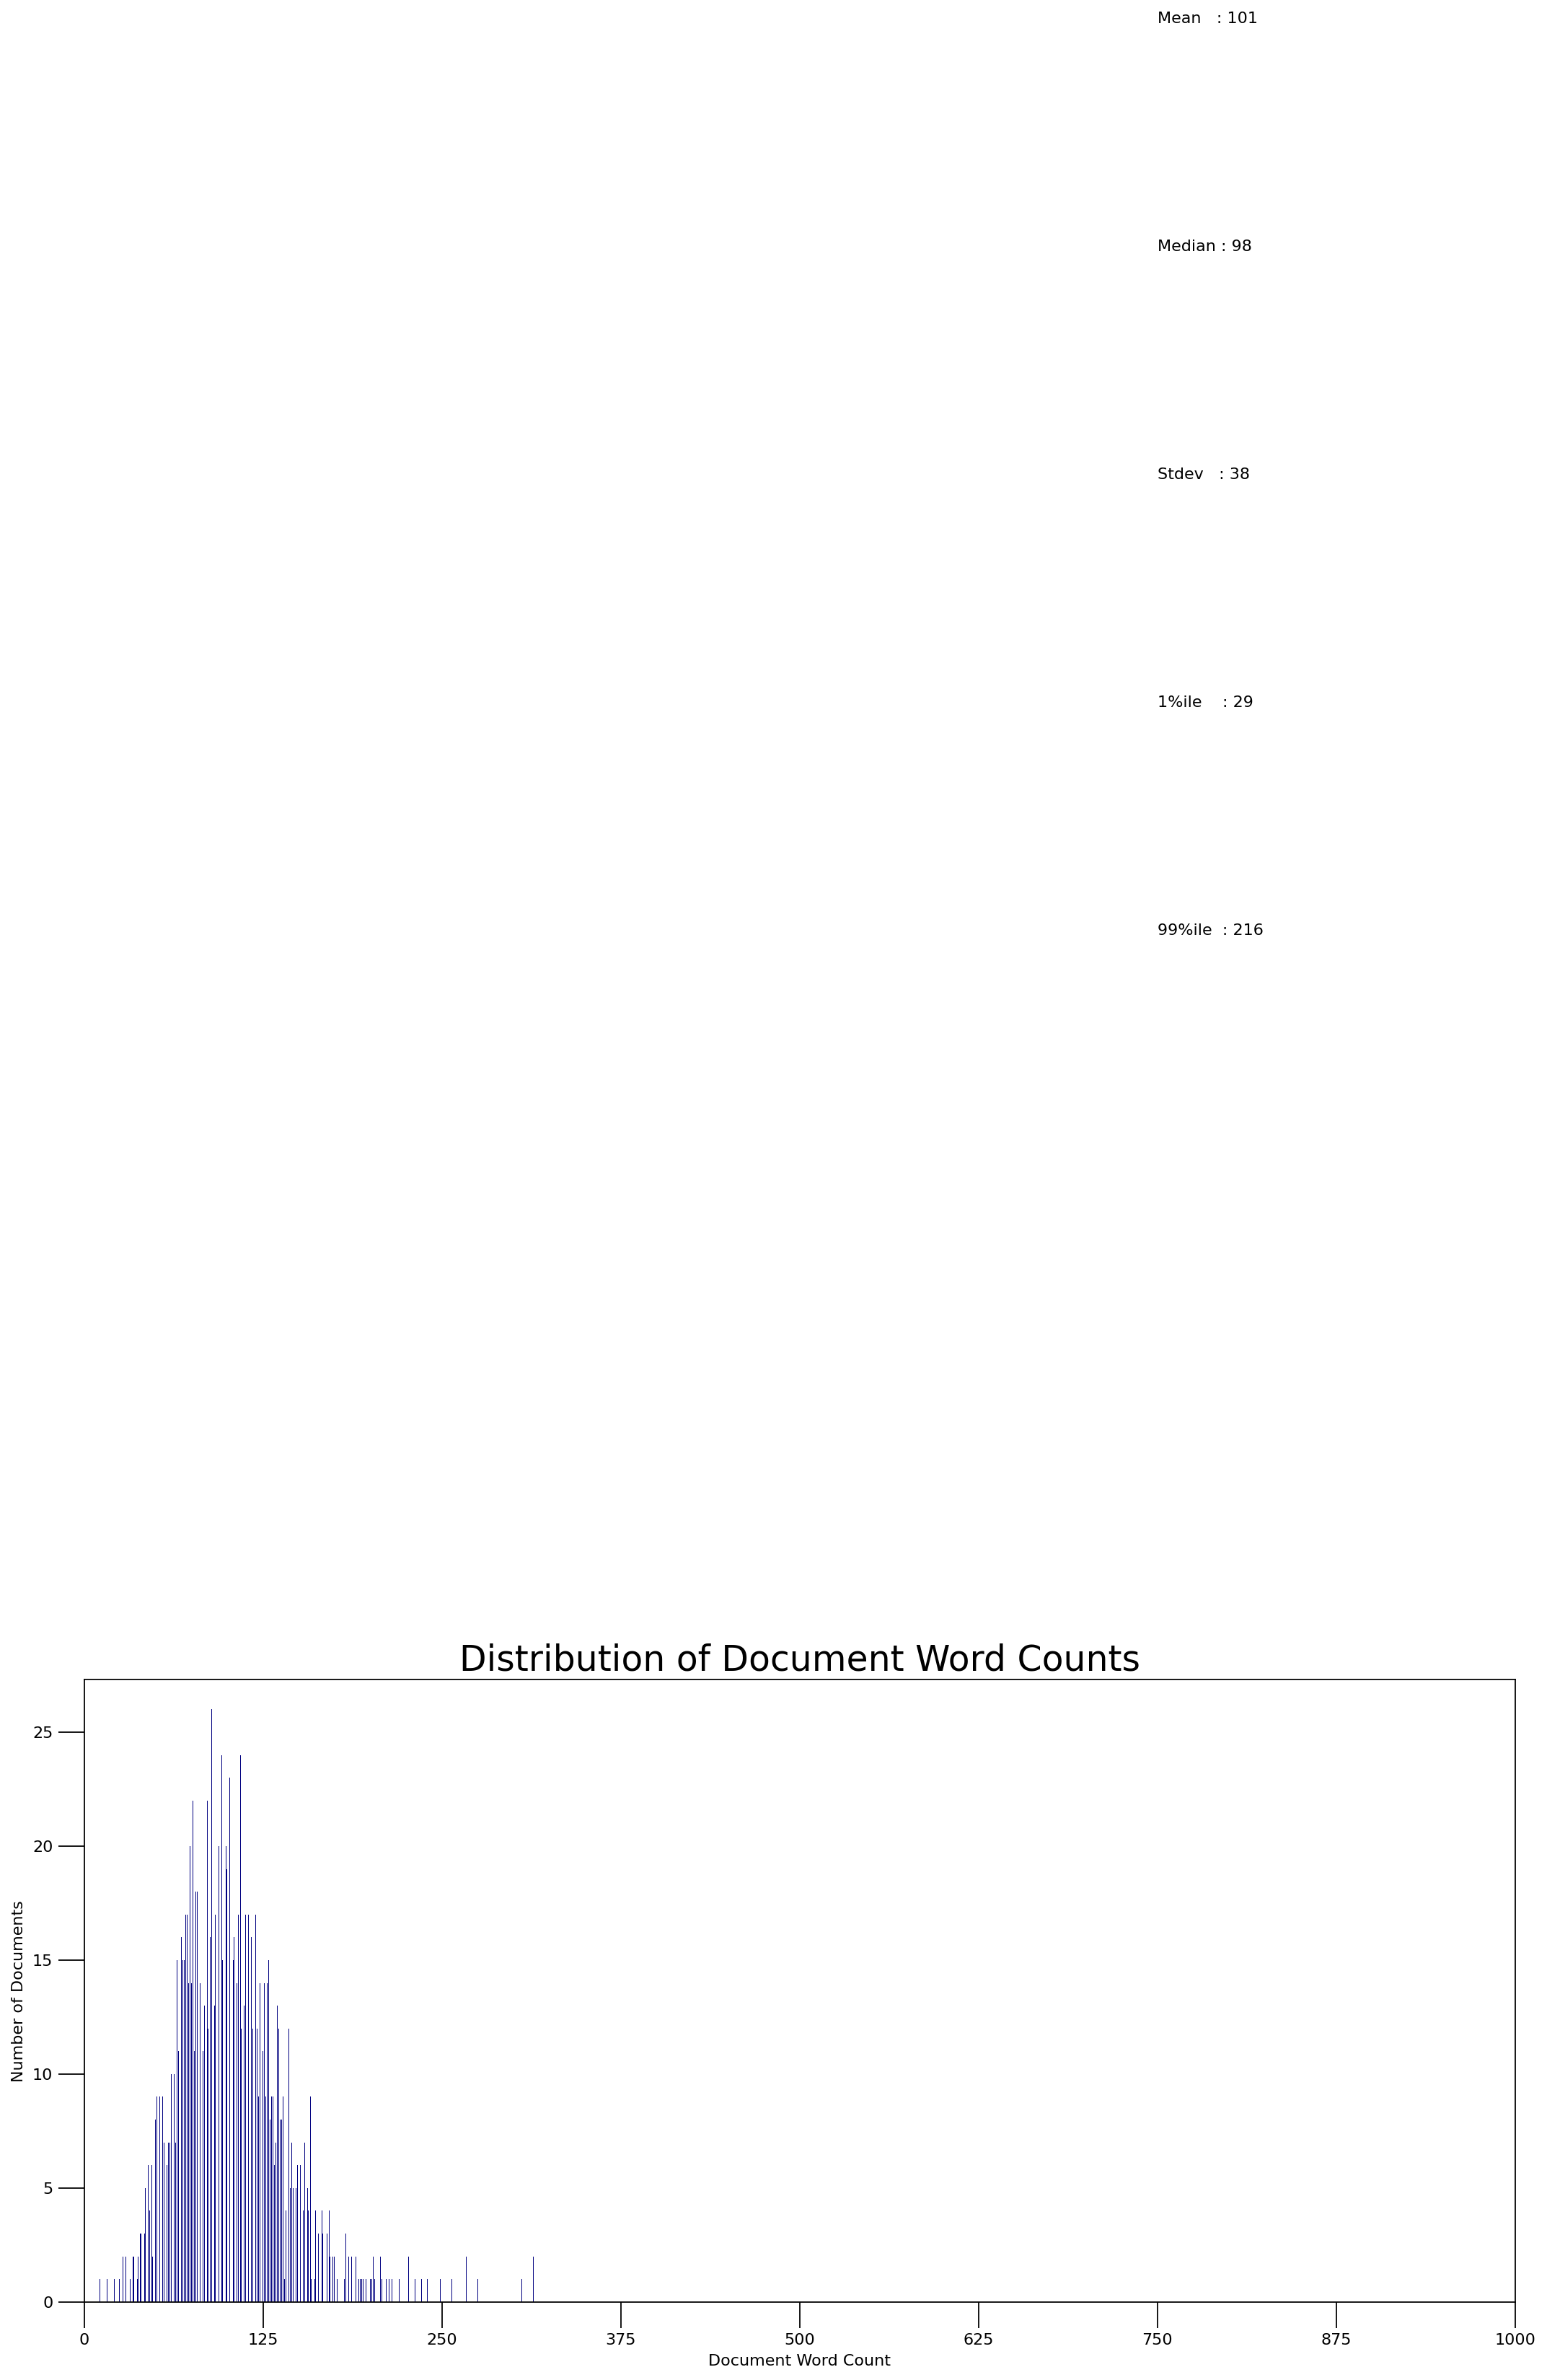

In [ ]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.colors as mcolors

<ipython-input-21-0bfb875cf536>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
<ipython-input-21-0bfb875cf536>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
<ipython-input-21-0bfb875cf536>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
<ipython-input-21-0bfb875cf536>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(doc_lens, col

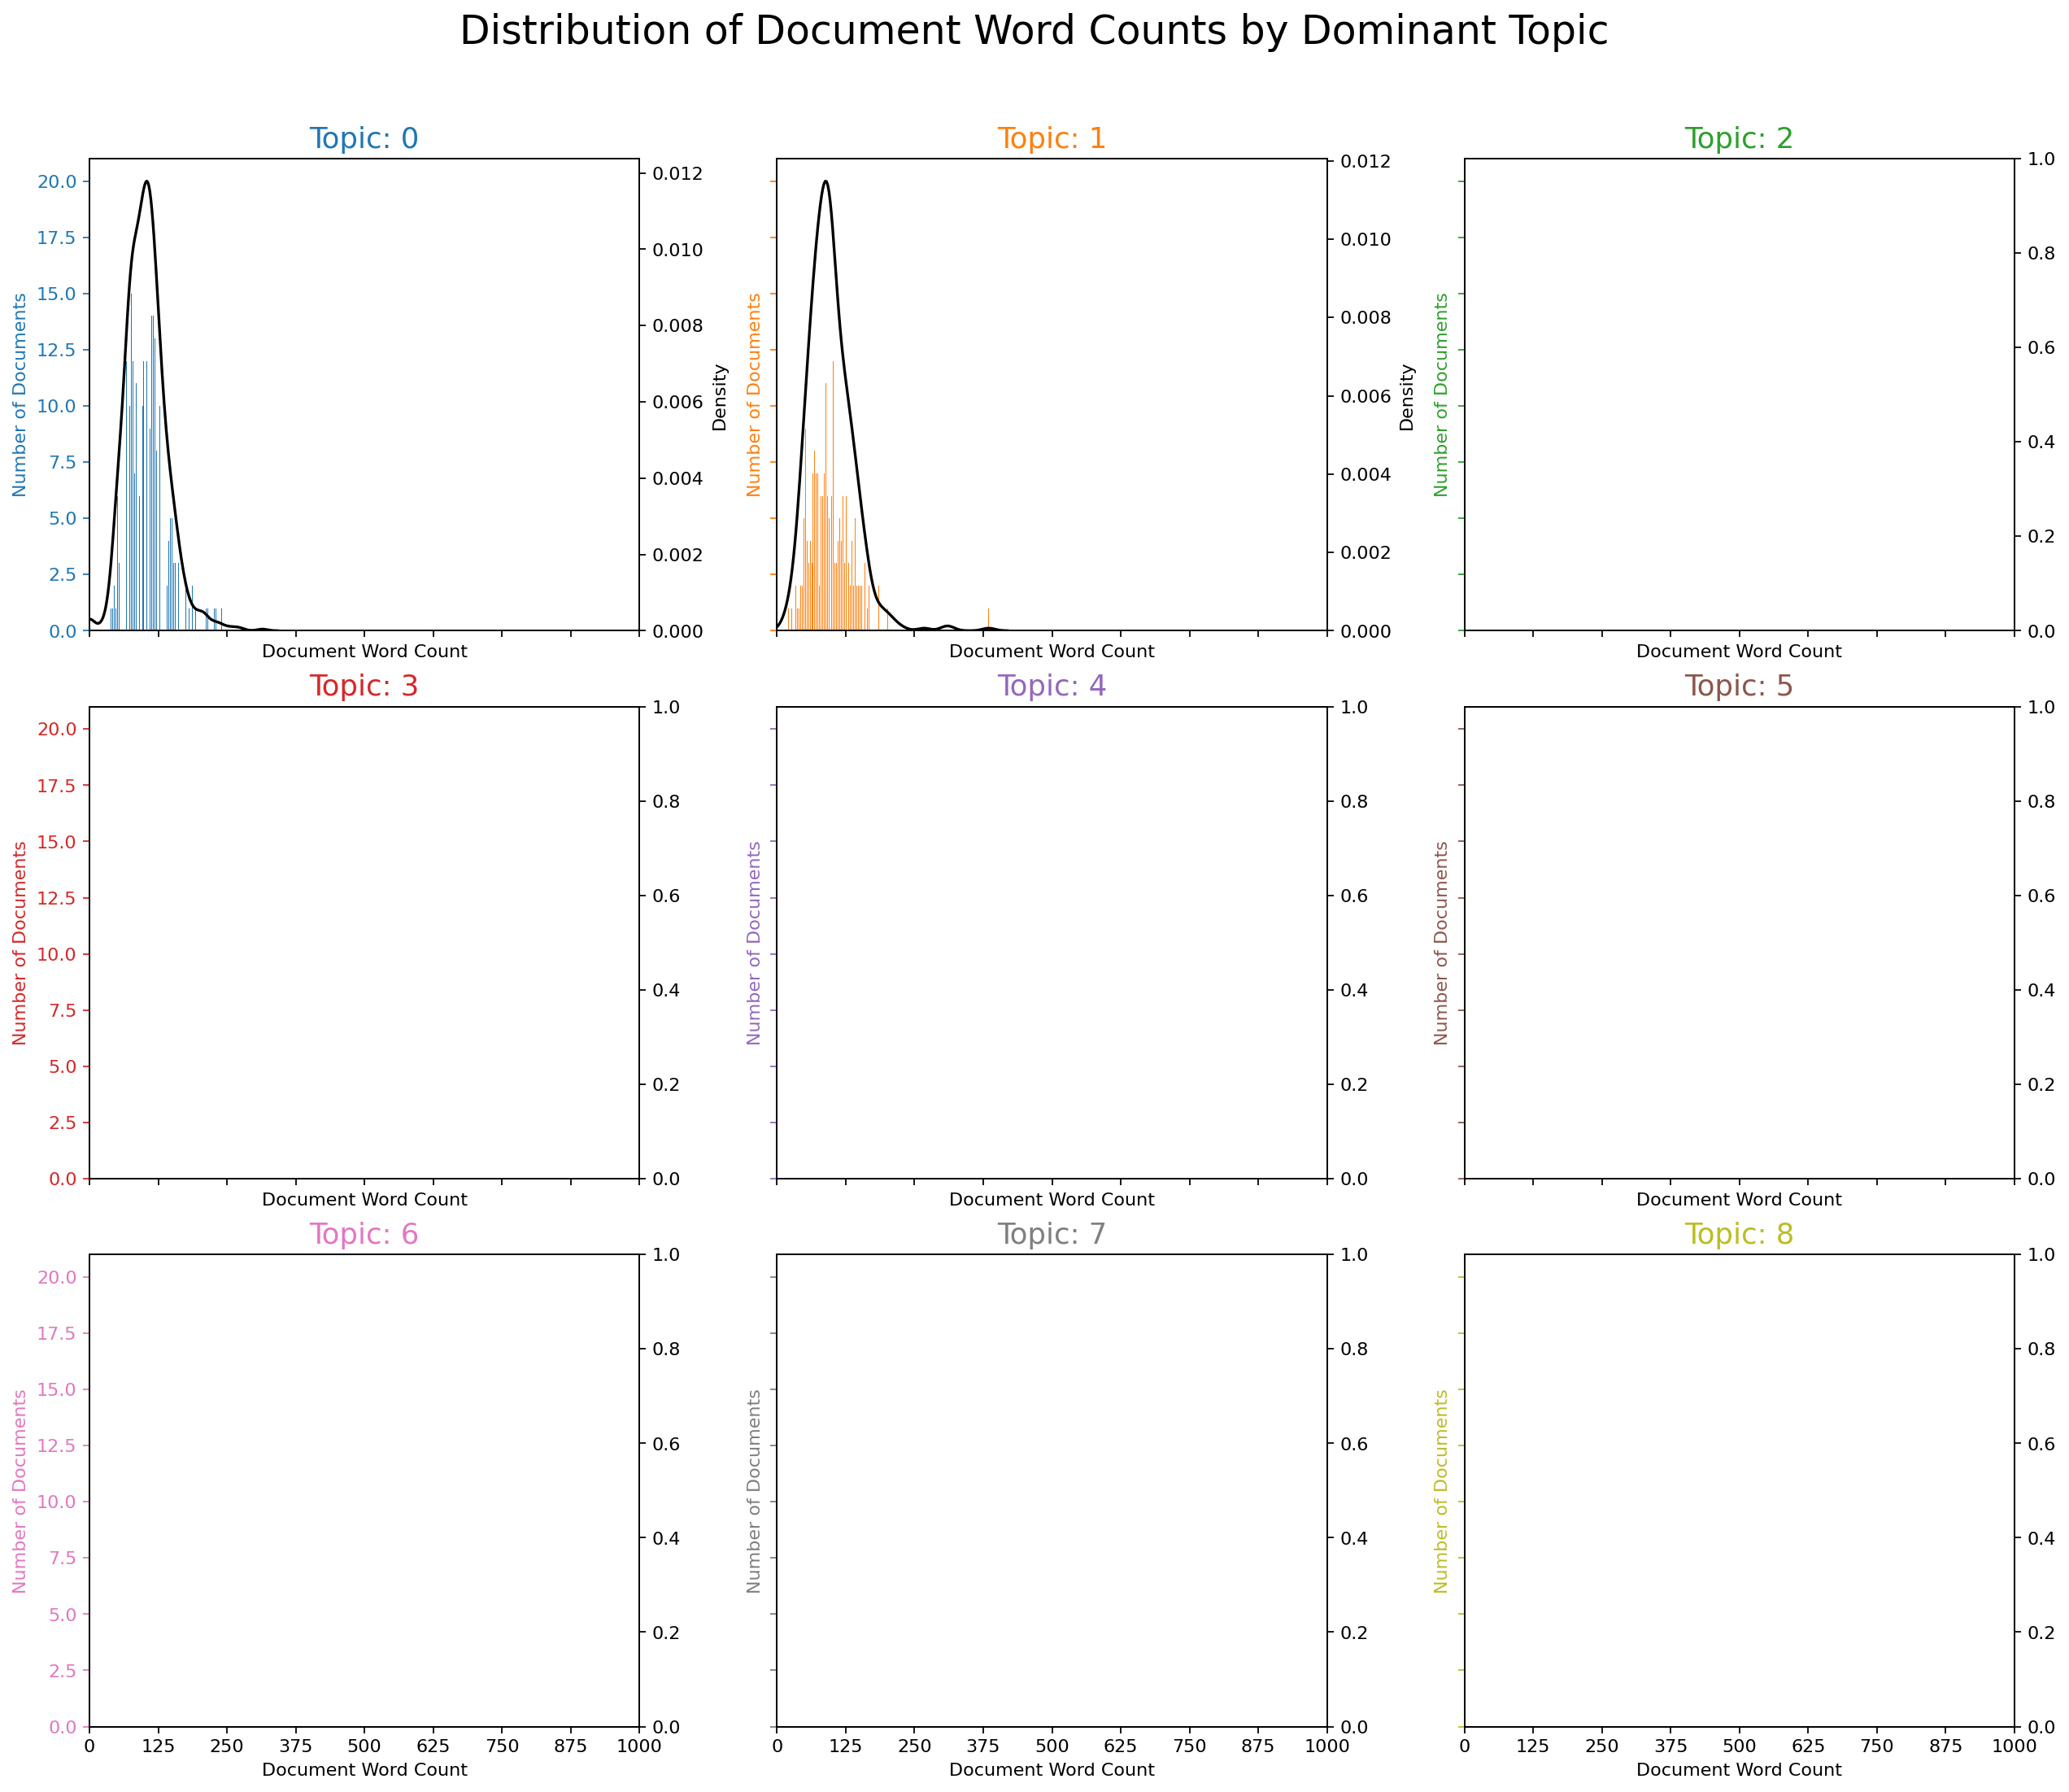

In [ ]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(3,3,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()